In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sn


In [2]:
sn.set_style("whitegrid")

In [3]:
df = pd.read_csv("heart_dieases.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Percentage of people having heart dieases

In [6]:
target = df.groupby("target").size()
target

target
0    499
1    526
dtype: int64

In [7]:
# numerical data into categorical data conversion

def heart_diease(row):
    if row==0:
        return "NO"
    elif row==1:
        return "YES"

In [8]:
df["Heart_Diease"]=df["target"].apply(heart_diease)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Diease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO


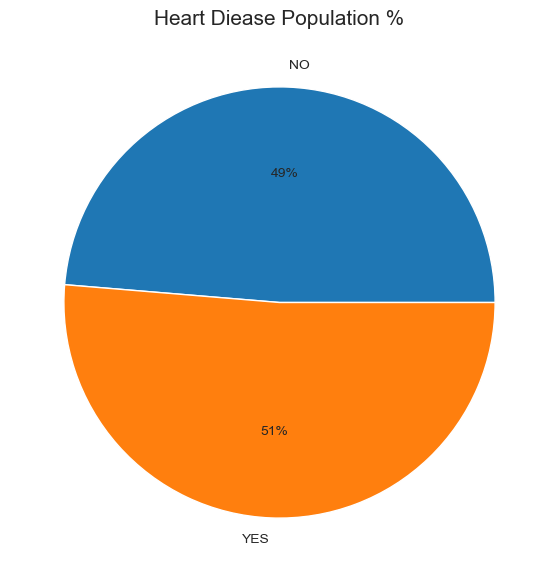

In [9]:
# pie chart for people having heart diease

mp.figure(figsize=(10,7))
mp.pie(target,labels=["NO","YES"], autopct="%0.0f%%")
mp.title("Heart Diease Population %", fontsize= 15)
mp.show()

#### From overall population, the count of people with heart diease is greater than the people who don't

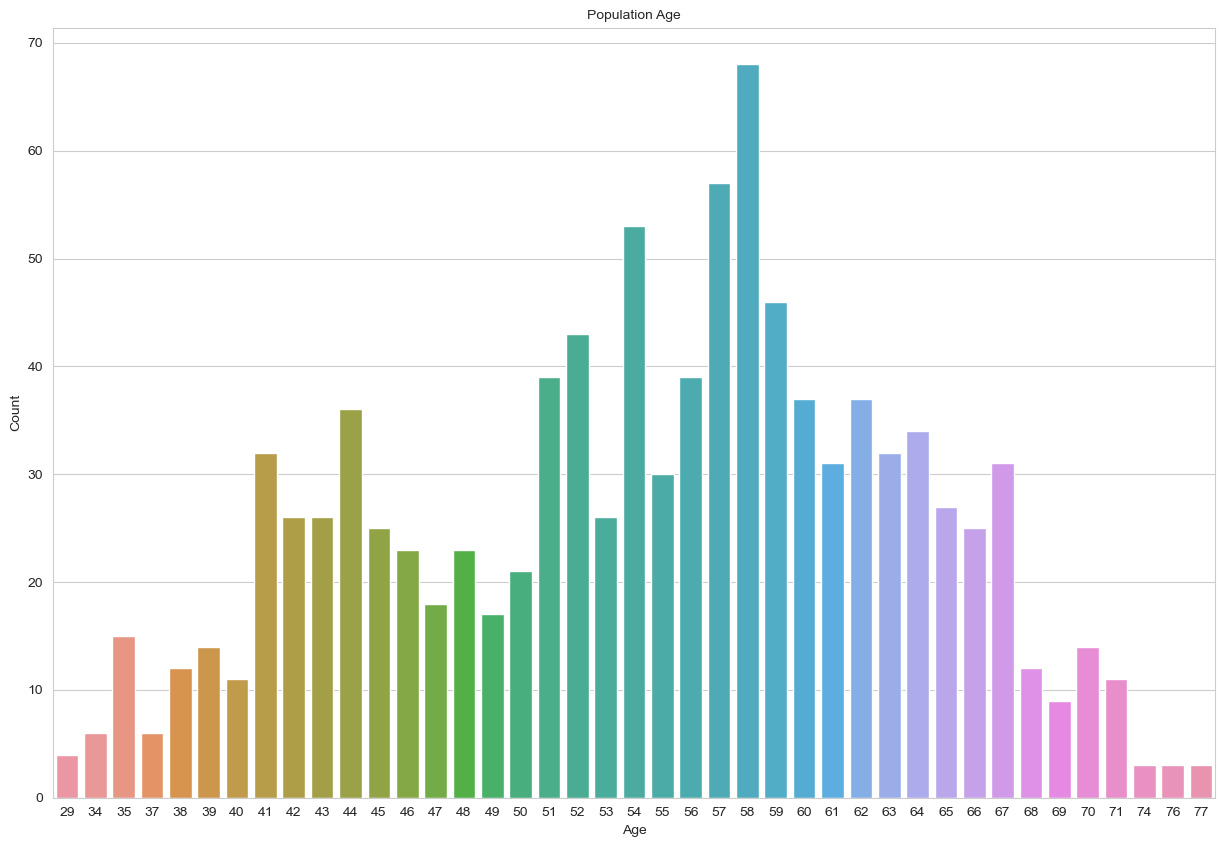

In [10]:
# countplot based on age

mp.figure(figsize=(15,10))
sn.countplot(x="age", data=df)
mp.title("Population Age", fontsize=10)
mp.xlabel("Age",fontsize=10)
mp.ylabel("Count",fontsize=10)
mp.show()

In [11]:
#statistical analysis

Min_Age=df["age"].min()
Max_Age=df["age"].max()
Mean_Age=df["age"].mean()
print("Minimum age =",Min_Age)
print("Maximum age =", Max_Age)
print("Mean age =", Mean_Age)

Minimum age = 29
Maximum age = 77
Mean age = 54.43414634146342


In [12]:
# Categorial Analysis

Young_Ages = df[(df["age"]>=20) & (df["age"]<35)]
Middle_Ages = df[(df["age"]>= 35) & (df["age"]<50)]
Elderly_Ages = df[(df["age"]>=50)]

print("Young Ages = ", len(Young_Ages))
print("Middle Ages =", len(Middle_Ages))
print("Elderly Ages =", len(Elderly_Ages))

Young Ages =  10
Middle Ages = 284
Elderly Ages = 731


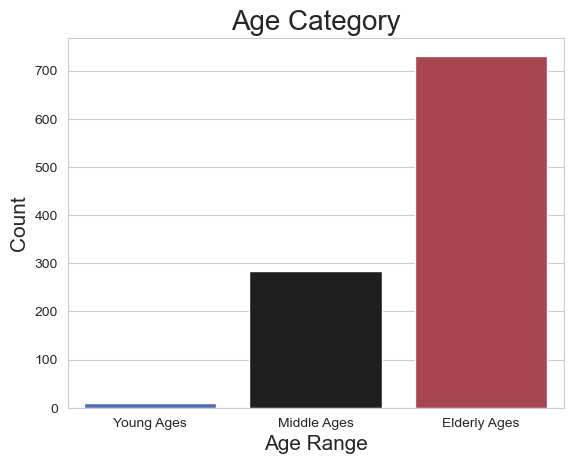

In [13]:
# barplot creation of age categories
 
sn.barplot(x=["Young Ages","Middle Ages","Elderly Ages"],y=[len(Young_Ages),len(Middle_Ages),len(Elderly_Ages)], palette= "icefire")
mp.title("Age Category", fontsize=20)
mp.xlabel("Age Range", fontsize=15)
mp.ylabel("Count", fontsize=15)
mp.show()

In [14]:
# Genderwise analysis

def gender(row):
    if row==1:
        return "Male"
    elif row==0:
        return "Female"

In [15]:
df["Gender"]= df["sex"].apply(gender)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Diease,Gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female


In [16]:
def age_range(row):
    if row>=20 and row<35:
        return "Young Aged"
    elif row>35 and row<50:
        return "Middle Aged"
    elif row> 50:
        return "Elder Aged"

In [17]:
df["Age_Range"]= df["age"].apply(age_range)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Diease,Gender,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male,Elder Aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male,Elder Aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male,Elder Aged
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male,Elder Aged
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female,Elder Aged


C:\Users\91703\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\91703\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


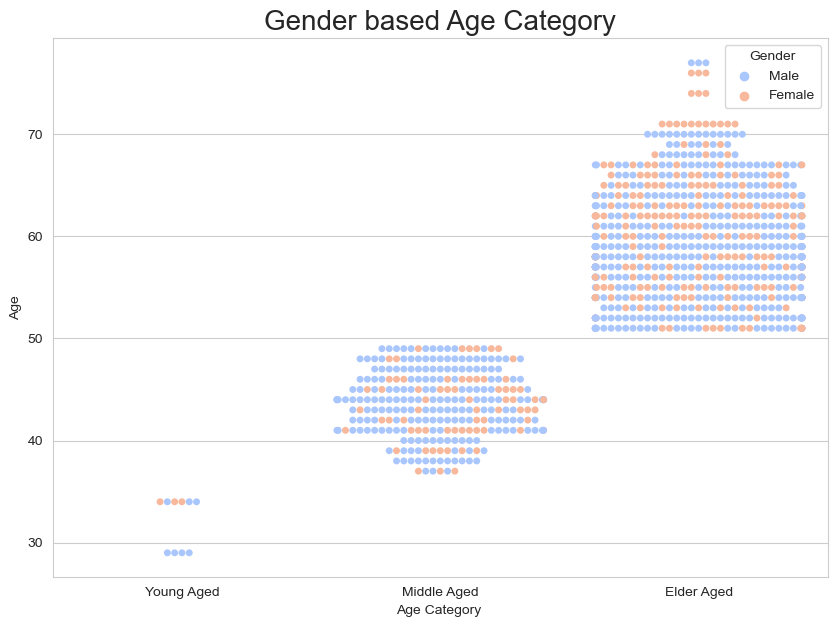

In [18]:
mp.figure(figsize=[10,7])
sn.swarmplot(x= "Age_Range", y= "age", hue= "Gender", data=df,order=["Young Aged", "Middle Aged","Elder Aged"], palette= "coolwarm")
mp.title("Gender based Age Category", fontsize=20)
mp.xlabel("Age Category ", fontsize=10)
mp.ylabel("Age", fontsize=10)
mp.show()

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Diease,Gender,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male,Elder Aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male,Elder Aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male,Elder Aged
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male,Elder Aged
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female,Elder Aged


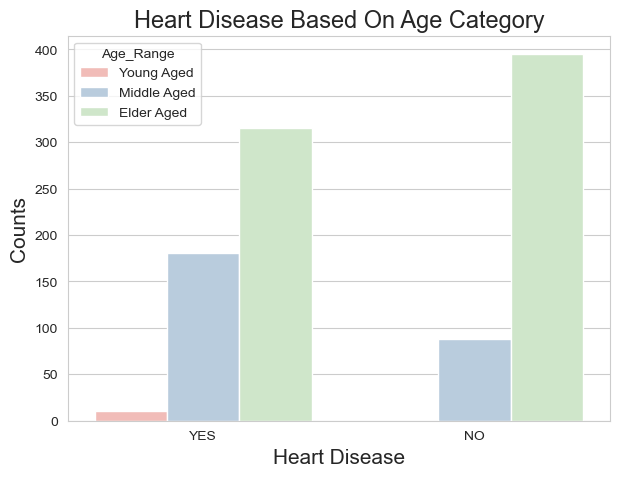

In [20]:
#Count Plot for Heart Disease Based On Age Category 
mp.figure(figsize=(7,5))
hue_order=['Young Aged', 'Middle Aged', 'Elder Aged']
sn.countplot(x='Heart_Diease', hue='Age_Range', data=df, order=['YES','NO'], hue_order=hue_order, palette='Pastel1')
mp.title('Heart Disease Based On Age Category', fontsize=17)
mp.xlabel('Heart Disease', fontsize=15)
mp.ylabel('Counts', fontsize=15)
mp.show()

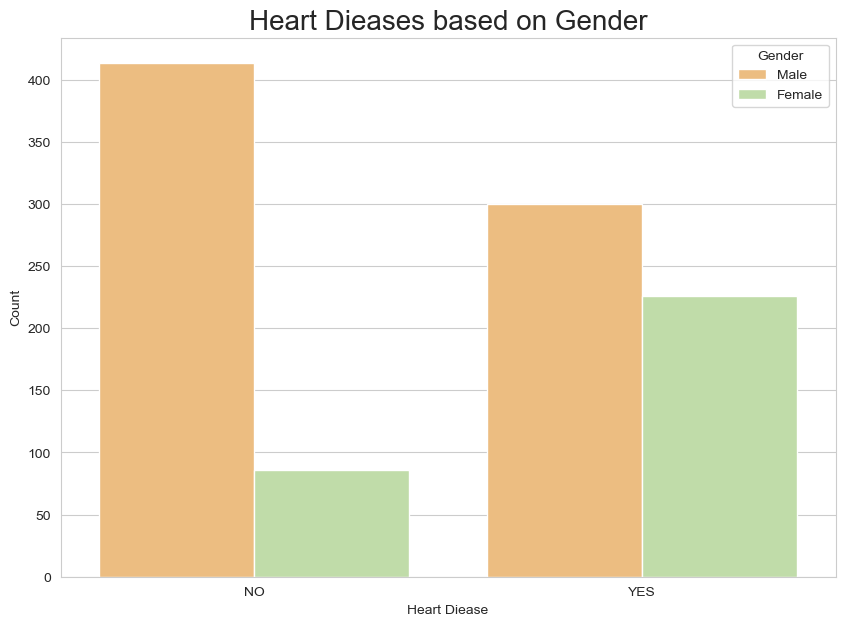

In [21]:
mp.figure(figsize=[10,7])
sn.countplot(x=df["Heart_Diease"], hue="Gender",data=df, palette="Spectral")
mp.title("Heart Dieases based on Gender", fontsize=20)
mp.xlabel("Heart Diease",fontsize=10)
mp.ylabel("Count",fontsize=10)
mp.show()

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Diease,Gender,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male,Elder Aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male,Elder Aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male,Elder Aged
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male,Elder Aged
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female,Elder Aged


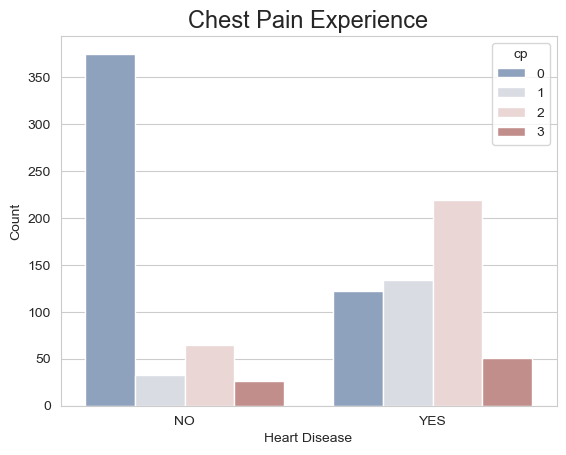

In [23]:
#Count plot based on chest pain experience

sn.countplot(x=df["Heart_Diease"], hue="cp",data=df, palette="vlag")
mp.title("Chest Pain Experience", fontsize=17)
mp.xlabel("Heart Disease", fontsize=10)
mp.ylabel("Count", fontsize=10)
mp.show()

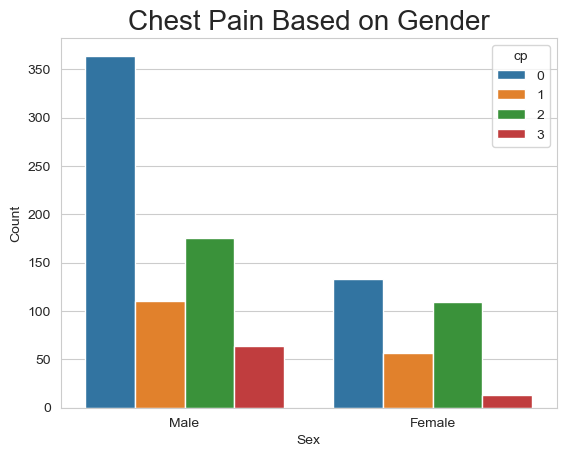

In [24]:
# count plot creation based on gender
sn.countplot(x=df["Gender"], hue="cp", data=df)
mp.title("Chest Pain Based on Gender", fontsize=20)
mp.xlabel("Sex", fontsize=10)
mp.ylabel("Count", fontsize=10)
mp.show()

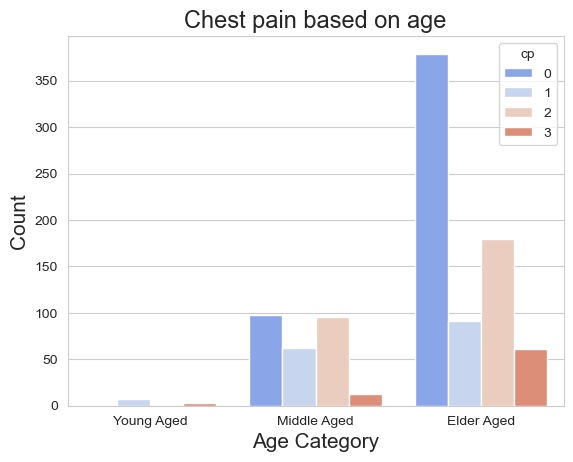

In [25]:
# chest pain based on age category

sn.countplot(x=df["Age_Range"], hue="cp",data=df, order=["Young Aged", "Middle Aged", "Elder Aged"], palette="coolwarm")
mp.title("Chest pain based on age", fontsize=17)
mp.xlabel("Age Category", fontsize=15)
mp.ylabel("Count", fontsize=15)
mp.show()

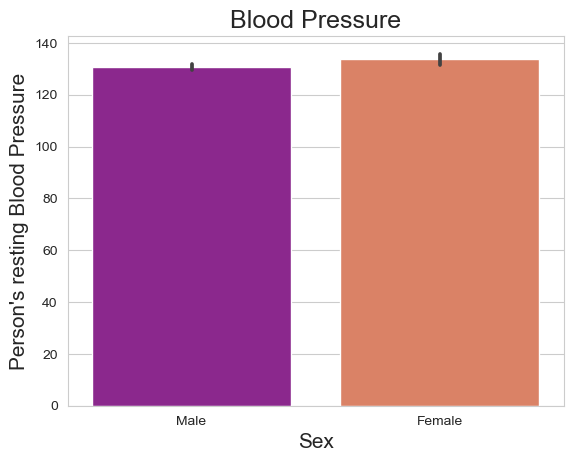

In [27]:
# persons resting bp

sn.barplot(x="Gender", y="trestbps",data=df, palette= "plasma")
mp.title("Blood Pressure", fontsize=18)
mp.xlabel("Sex",fontsize=15)
mp.ylabel("Person's resting Blood Pressure",fontsize =15)
mp.show()

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Diease,Gender,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male,Elder Aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male,Elder Aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male,Elder Aged
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male,Elder Aged
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female,Elder Aged


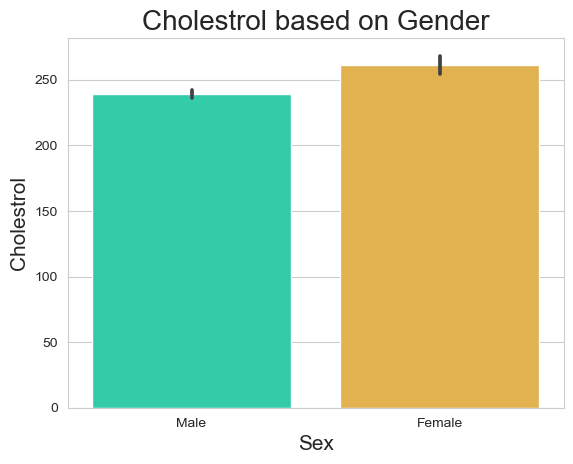

In [28]:
# Barplot of cholestrol based on gender

sn.barplot(x="Gender",y="chol",data=df,palette="turbo")
mp.title("Cholestrol based on Gender", fontsize=20)
mp.xlabel("Sex",fontsize=15)
mp.ylabel("Cholestrol",fontsize=15)
mp.show()

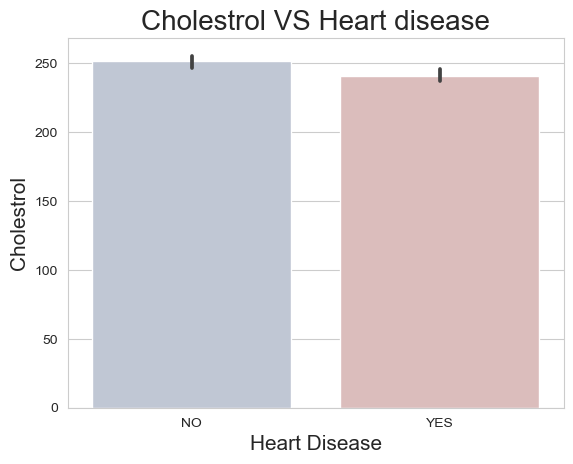

In [29]:
# Barplot creation of Heart disease vs Cholestrol
sn.barplot(x="Heart_Diease",y="chol", data=df, palette="vlag")
mp.title("Cholestrol VS Heart disease",fontsize=20)
mp.xlabel("Heart Disease", fontsize=15)
mp.ylabel("Cholestrol",fontsize=15)
mp.show()

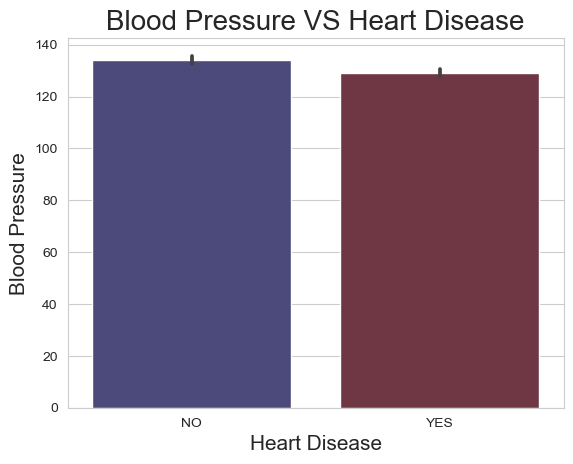

In [30]:
# bARplot for blood pressure vs Heart disease

sn.barplot(x="Heart_Diease",y="trestbps",data=df, palette="icefire")
mp.title("Blood Pressure VS Heart Disease",fontsize=20)
mp.xlabel("Heart Disease",fontsize=15)
mp.ylabel("Blood Pressure",fontsize=15)
mp.show()

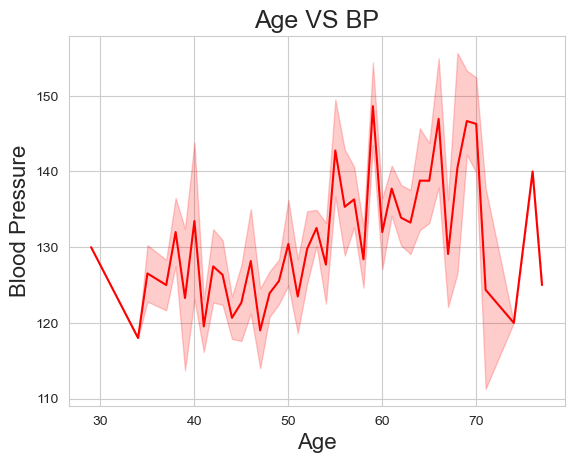

In [49]:
sn.lineplot(x="age",y="trestbps",data=df,color="red")
mp.title("Age VS BP",fontsize=18)
mp.xlabel("Age",fontsize=16)
mp.ylabel("Blood Pressure", fontsize=16)
mp.show()

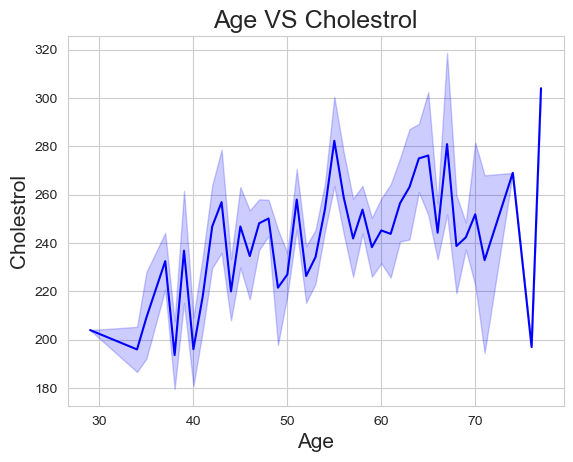

In [37]:
# Lineplot for age vs cholestrol
sn.lineplot(x="age",y="chol",data=df,color="blue")
mp.title("Age VS Cholestrol",fontsize=18)
mp.xlabel("Age",fontsize=15)
mp.ylabel("Cholestrol",fontsize=15)
mp.show()

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Diease,Gender,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male,Elder Aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male,Elder Aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male,Elder Aged
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male,Elder Aged
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female,Elder Aged


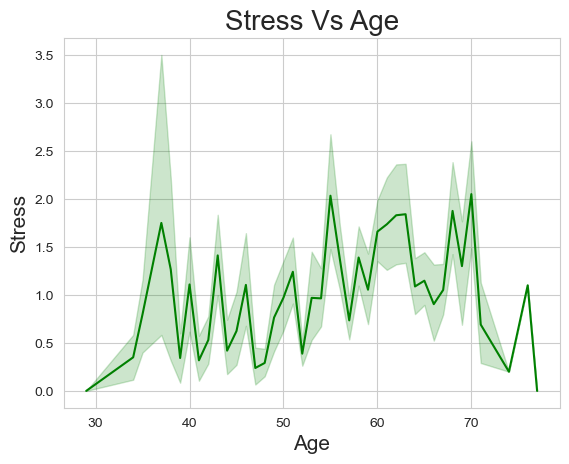

In [39]:
# Lineplot of Stress Vs Age

sn.lineplot(x="age",y="oldpeak",data=df, color= "green")
mp.title("Stress Vs Age",fontsize=20)
mp.xlabel("Age", fontsize=15)
mp.ylabel("Stress",fontsize=15)
mp.show()

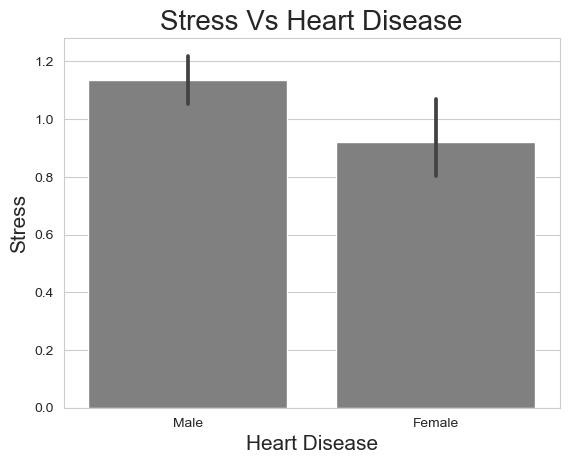

In [42]:
# Stress VS Heart disease

sn.barplot(x="Gender",y="oldpeak",data=df,color="grey")
mp.title("Stress Vs Heart Disease", fontsize=20)
mp.xlabel("Heart Disease", fontsize=15)
mp.ylabel("Stress",fontsize=15)
mp.show()

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Diease,Gender,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male,Elder Aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male,Elder Aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male,Elder Aged
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male,Elder Aged
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female,Elder Aged


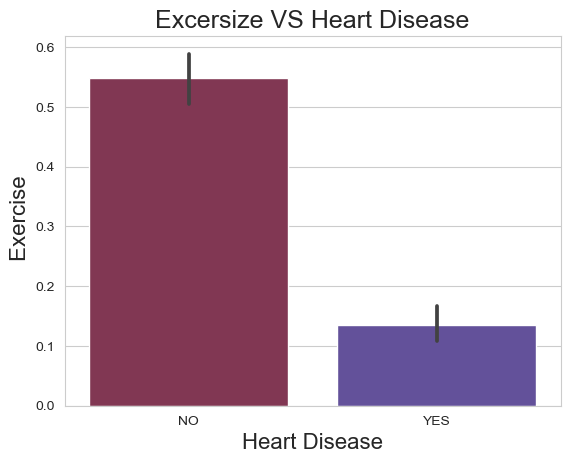

In [44]:
# bar plot creation of excersise Vs heart dieases

sn.barplot(x="Heart_Diease",y="exang",data=df, palette= "twilight_r")
mp.title("Excersize VS Heart Disease", fontsize=18)
mp.xlabel("Heart Disease", fontsize=16)
mp.ylabel(" Exercise", fontsize=16)
mp.show()

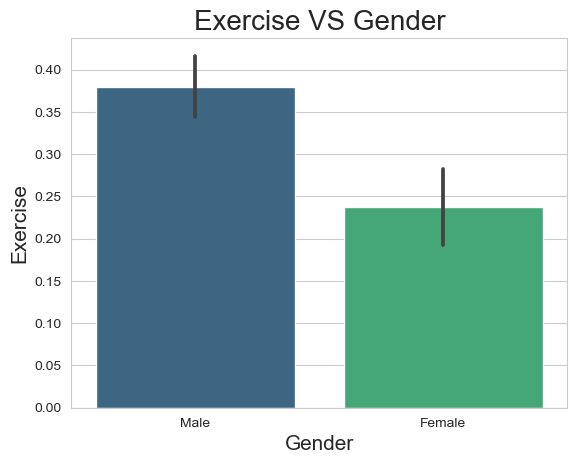

In [45]:
# Bar plot of exercise VS Gender

sn.barplot(x="Gender",y="exang", data=df, palette="viridis")
mp.title("Exercise VS Gender", fontsize=20)
mp.xlabel("Gender",fontsize=15)
mp.ylabel("Exercise", fontsize=15)
mp.show()

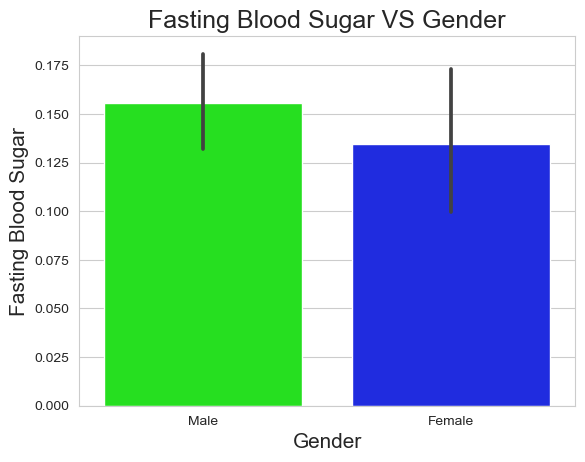

In [46]:
# bar plot of fasting sugar vs gender

sn.barplot(x="Gender",y="fbs",data=df, palette= "hsv")
mp.title("Fasting Blood Sugar VS Gender", fontsize=18)
mp.xlabel("Gender",fontsize=15)
mp.ylabel("Fasting Blood Sugar",fontsize=15)
mp.show()

In [47]:
num_col= df.select_dtypes(include=np.number)
num_col.cov()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.306450,-0.431198,-0.672251,43.085733,102.890625,0.392164,-0.635490,-81.446089,0.378144,2.218825,-0.947742,2.539458,0.407093,-1.040392
sex,-0.431198,0.211944,-0.019491,-0.636863,-4.708984,0.004465,-0.013395,-0.522838,0.030288,0.045812,-0.007584,0.053021,0.056697,-0.064346
cp,-0.672251,-0.019491,1.060160,0.688565,-4.336914,0.029108,0.023687,7.268296,-0.195451,-0.211407,0.083727,-0.187017,-0.104385,0.223903
trestbps,43.085733,-0.636863,0.688565,306.835410,115.657227,1.135165,-1.144685,-15.822822,0.506798,3.857971,-1.303344,1.887842,0.644446,-1.215584
chol,102.890625,-4.708984,-4.336914,115.657227,2661.787109,0.495117,-4.014648,-25.841797,1.643555,3.933301,-0.454102,3.949219,3.209961,-2.579102
fbs,0.392164,0.004465,0.029108,1.135165,0.495117,0.127111,-0.019583,-0.072719,0.008303,0.004549,-0.013634,0.050406,-0.009333,-0.007339
restecg,-0.635490,-0.013395,0.023687,-1.144685,-4.014648,-0.019583,0.278655,0.587909,-0.016373,-0.031085,0.028073,-0.042482,-0.006718,0.035496
thalach,-81.446089,-0.522838,7.268296,-15.822822,-25.841797,-0.072719,0.587909,529.263325,-4.136114,-9.456022,5.618078,-4.929917,-1.400290,4.865194
exang,0.378144,0.030288,-0.195451,0.506798,1.643555,0.008303,-0.016373,-4.136114,0.223514,0.172684,-0.078077,0.052558,0.057865,-0.103558
oldpeak,2.218825,0.045812,-0.211407,3.857971,3.933301,0.004549,-0.031085,-9.456022,0.172684,1.380750,-0.417527,0.268673,0.147810,-0.257632


<Axes: >

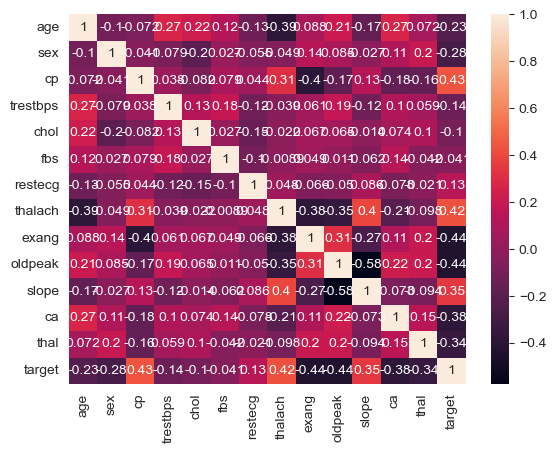

In [48]:
sn.heatmap(num_col.corr(),annot= True)

In [51]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Diease,Gender,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male,Elder Aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male,Elder Aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male,Elder Aged
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male,Elder Aged
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female,Elder Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,YES,Male,Elder Aged
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,NO,Male,Elder Aged
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,NO,Male,Middle Aged
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,YES,Female,None
